In [1]:
import matplotlib, numpy, pandas, scipy, sklearn

In [2]:
import pandas as pd


In [3]:
import os

def get_download_path():
    """Returns the default downloads path for linux or windows"""
    if os.name == 'nt':
        import winreg
        sub_key = r'SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\Shell Folders'
        downloads_guid = '{374DE290-123F-4565-9164-39C4925E467B}'
        with winreg.OpenKey(winreg.HKEY_CURRENT_USER, sub_key) as key:
            location = winreg.QueryValueEx(key, downloads_guid)[0]
        return location
    else:
        return os.path.join(os.path.expanduser('~'), 'downloads')

In [4]:
csv_path = get_download_path() + '\\anthony-fantano-reviews\\fantano_reviews_modified.csv'

In [5]:
print (csv_path)

C:\Users\aberham.haile\Downloads\anthony-fantano-reviews\fantano_reviews_modified.csv


In [6]:
reviews = pd.read_csv(csv_path, sep=',', encoding='latin-1')

In [7]:
reviews.head()

,Unnamed: 0,title,artist,review_date,review_type,score,word_score,best_tracks,worst_track,link
0,0,Cosmogramma,Flying Lotus,5/5/2010,Album,8,NaN,[],NaN,https://www.youtube.com/watch?v=KCuamde9Atc
1,1,Throat,Little Women,5/9/2010,Album,9,NaN,[],NaN,https://www.youtube.com/watch?v=cndwH6byJnk
2,2,Latin,Holy Fuck,5/10/2010,Album,7,NaN,[],NaN,https://www.youtube.com/watch?v=ySXryTlo9Ac
3,3,High Violet,The National,5/11/2010,Album,6,NaN,[],NaN,https://www.youtube.com/watch?v=DuMUDldrG3g
4,4,At Echo Lake,Woods,5/12/2010,Album,8,NaN,[],NaN,https://www.youtube.com/watch?v=ncrpTX6jR5w


In [8]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 10 columns):
Unnamed: 0     1568 non-null int64
title          1568 non-null object
artist         1568 non-null object
review_date    1568 non-null object
review_type    1568 non-null object
score          1568 non-null int64
word_score     0 non-null float64
best_tracks    1568 non-null object
worst_track    1332 non-null object
link           1568 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 122.6+ KB


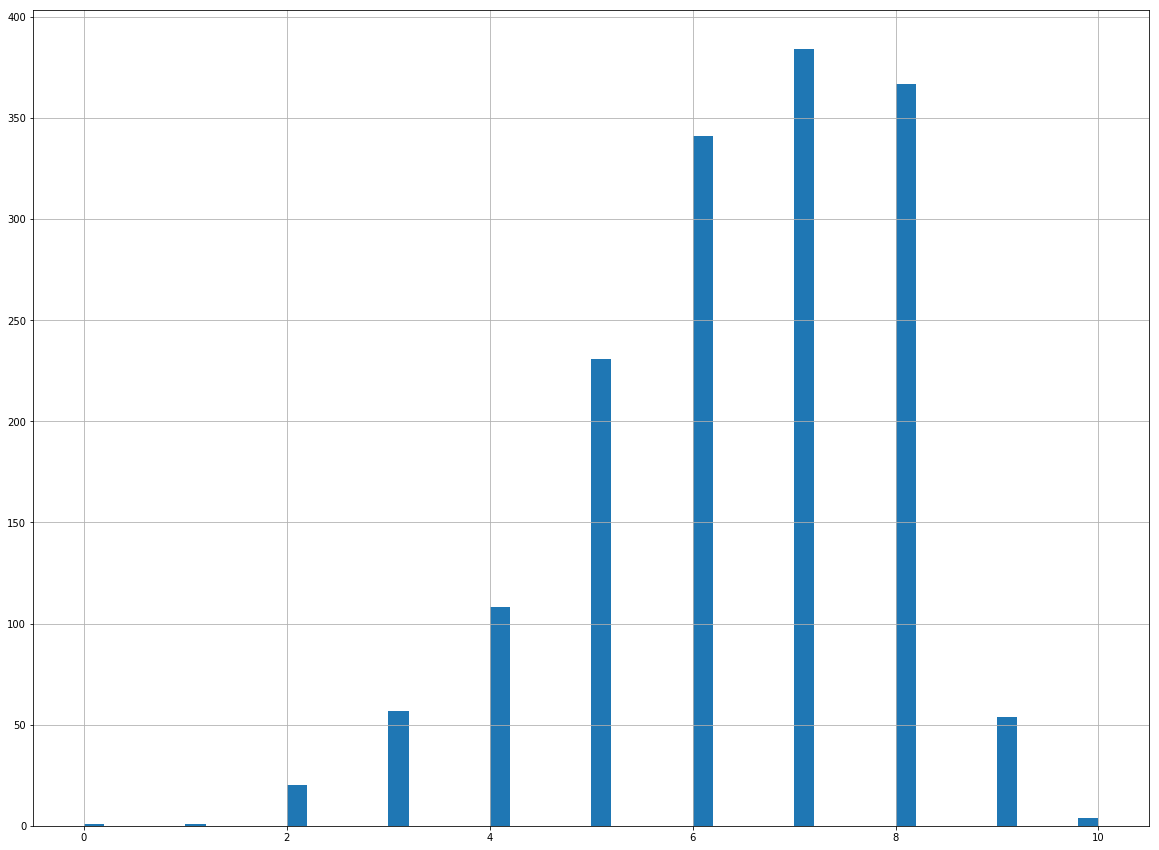

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
reviews.score.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
aff_path = get_download_path() + '\\anthony-fantano-reviews\\captions.csv'

In [11]:
aff = pd.read_csv(aff_path, sep=',', encoding='latin-1')

In [12]:
from afinn import Afinn
afinn = Afinn()

In [13]:
def search(a):
    b = ['one', '1', 'two', '2', 'three', '3', 'four', '4', 'five', '5', 'six', '6', 'seven', '7', 'eight', '8', 'nine', '9', 'ten', '10']
    arr = []
    for x in range(0, len(b)):
        if a.find(b[x]) > -1:
            arr.append(a.index(b[x]))
    if len(arr) > 0:
        return max(arr)
    else:
        return

In [14]:
aff.caption = aff.caption.astype(str).apply(lambda x: x[0:search(x)] )
aff.caption = aff.caption.astype(str).apply(lambda x: afinn.score(x))
# aff.caption = aff.caption.astype(str).apply(lambda x: len(x))

In [15]:
aff.head(5)

,Unnamed: 0,caption,link
0,0,55.0,https://www.youtube.com/watch?v=KCuamde9Atc
1,1,28.0,https://www.youtube.com/watch?v=cndwH6byJnk
2,2,29.0,https://www.youtube.com/watch?v=ySXryTlo9Ac
3,3,44.0,https://www.youtube.com/watch?v=DuMUDldrG3g
4,4,12.0,https://www.youtube.com/watch?v=ncrpTX6jR5w


In [16]:
reviews.head(5)

,Unnamed: 0,title,artist,review_date,review_type,score,word_score,best_tracks,worst_track,link
0,0,Cosmogramma,Flying Lotus,5/5/2010,Album,8,NaN,[],NaN,https://www.youtube.com/watch?v=KCuamde9Atc
1,1,Throat,Little Women,5/9/2010,Album,9,NaN,[],NaN,https://www.youtube.com/watch?v=cndwH6byJnk
2,2,Latin,Holy Fuck,5/10/2010,Album,7,NaN,[],NaN,https://www.youtube.com/watch?v=ySXryTlo9Ac
3,3,High Violet,The National,5/11/2010,Album,6,NaN,[],NaN,https://www.youtube.com/watch?v=DuMUDldrG3g
4,4,At Echo Lake,Woods,5/12/2010,Album,8,NaN,[],NaN,https://www.youtube.com/watch?v=ncrpTX6jR5w


In [17]:
from dateutil import parser
reviews.review_date = reviews.review_date.astype(str).apply(lambda x: parser.parse(x).timetuple().tm_yday)

In [18]:
reviews.head(5)

,Unnamed: 0,title,artist,review_date,review_type,score,word_score,best_tracks,worst_track,link
0,0,Cosmogramma,Flying Lotus,125,Album,8,NaN,[],NaN,https://www.youtube.com/watch?v=KCuamde9Atc
1,1,Throat,Little Women,129,Album,9,NaN,[],NaN,https://www.youtube.com/watch?v=cndwH6byJnk
2,2,Latin,Holy Fuck,130,Album,7,NaN,[],NaN,https://www.youtube.com/watch?v=ySXryTlo9Ac
3,3,High Violet,The National,131,Album,6,NaN,[],NaN,https://www.youtube.com/watch?v=DuMUDldrG3g
4,4,At Echo Lake,Woods,132,Album,8,NaN,[],NaN,https://www.youtube.com/watch?v=ncrpTX6jR5w


In [19]:
reviews.describe()

,Unnamed: 0,review_date,score,word_score
count,1568.000000,1568.000000,1568.000000,0.0
mean,850.821429,181.047194,6.374362,NaN
std,501.063322,99.667522,1.544748,NaN
min,0.000000,2.000000,0.000000,NaN
25%,416.750000,97.000000,5.000000,NaN
50%,851.500000,178.500000,7.000000,NaN
75%,1273.250000,269.250000,8.000000,NaN
max,1733.000000,365.000000,10.000000,NaN


In [20]:
reviews.best_tracks = reviews.best_tracks.astype(str).apply(
    lambda x: 0 if len(x.split(',')) == 1 else len(x.split(',')))
reviews.worst_track = reviews.worst_track.astype(str).apply(
    lambda x: 0 if len(x.split(',')) == 1 else len(x.split(',')))

In [21]:
reviews.head(11)

,Unnamed: 0,title,artist,review_date,review_type,score,word_score,best_tracks,worst_track,link
0,0,Cosmogramma,Flying Lotus,125,Album,8,NaN,0,0,https://www.youtube.com/watch?v=KCuamde9Atc
1,1,Throat,Little Women,129,Album,9,NaN,0,0,https://www.youtube.com/watch?v=cndwH6byJnk
2,2,Latin,Holy Fuck,130,Album,7,NaN,0,0,https://www.youtube.com/watch?v=ySXryTlo9Ac
3,3,High Violet,The National,131,Album,6,NaN,0,0,https://www.youtube.com/watch?v=DuMUDldrG3g
4,4,At Echo Lake,Woods,132,Album,8,NaN,0,0,https://www.youtube.com/watch?v=ncrpTX6jR5w
5,5,Together,The New Pornographers,133,Album,7,NaN,0,0,https://www.youtube.com/watch?v=Lfw6vPZAUtc
6,6,Sea of Cowards,The Dead Weather,136,Album,5,NaN,0,0,https://www.youtube.com/watch?v=v_7WlMvv50I
7,7,This Is Happening,LCD Soundsystem,137,Album,9,NaN,0,0,https://www.youtube.com/watch?v=3Hbhb5CGEB0
8,8,Brothers,The Black Keys,138,Album,7,NaN,0,0,https://www.youtube.com/watch?v=0zMQS8YxYNA
9,9,Treats,Sleigh Bells,139,Album,3,NaN,0,0,https://www.youtube.com/watch?v=1aJXrwCX20U


In [22]:
merged = reviews.merge(aff, on='link')

In [23]:
merged = merged.drop(['word_score'], axis=1)
merged = merged.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
merged = merged.drop(['link'], axis=1)



In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1567
Data columns (total 8 columns):
title          1568 non-null object
artist         1568 non-null object
review_date    1568 non-null int64
review_type    1568 non-null object
score          1568 non-null int64
best_tracks    1568 non-null int64
worst_track    1568 non-null int64
caption        1568 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 110.2+ KB


In [25]:
merged = merged.drop(['artist', 'title'], axis=1)

In [26]:
merged.head(11)

,review_date,review_type,score,best_tracks,worst_track,caption
0,125,Album,8,0,0,55.0
1,129,Album,9,0,0,28.0
2,130,Album,7,0,0,29.0
3,131,Album,6,0,0,44.0
4,132,Album,8,0,0,12.0
5,133,Album,7,0,0,39.0
6,136,Album,5,0,0,15.0
7,137,Album,9,0,0,26.0
8,138,Album,7,0,0,35.0
9,139,Album,3,0,0,26.0


In [27]:
data_dummies = pd.get_dummies(merged)
data_dummies = data_dummies.drop(['score'], axis=1)
data_dummies.shape

(1568, 6)

In [28]:
data_dummies.head(5)

,review_date,best_tracks,worst_track,caption,review_type_Album,review_type_EP
0,125,0,0,55.0,1,0
1,129,0,0,28.0,1,0
2,130,0,0,29.0,1,0
3,131,0,0,44.0,1,0
4,132,0,0,12.0,1,0


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_dummies, merged.score, test_size = 0.2, random_state = 42)

In [30]:
X_train.head(5)

,review_date,best_tracks,worst_track,caption,review_type_Album,review_type_EP
1085,279,4,0,22.0,1,0
208,158,3,0,5.0,1,0
1053,305,2,0,20.0,0,1
451,250,3,0,11.0,1,0
415,325,2,0,105.0,0,1


In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)


In [32]:
lr.score(X_test, y_test)

0.4536331507741288

In [33]:
reviews.head(5)

,Unnamed: 0,title,artist,review_date,review_type,score,word_score,best_tracks,worst_track,link
0,0,Cosmogramma,Flying Lotus,125,Album,8,NaN,0,0,https://www.youtube.com/watch?v=KCuamde9Atc
1,1,Throat,Little Women,129,Album,9,NaN,0,0,https://www.youtube.com/watch?v=cndwH6byJnk
2,2,Latin,Holy Fuck,130,Album,7,NaN,0,0,https://www.youtube.com/watch?v=ySXryTlo9Ac
3,3,High Violet,The National,131,Album,6,NaN,0,0,https://www.youtube.com/watch?v=DuMUDldrG3g
4,4,At Echo Lake,Woods,132,Album,8,NaN,0,0,https://www.youtube.com/watch?v=ncrpTX6jR5w


In [43]:
#WIP
# import requests
# import json
# import re
# headers={
#     "X-Mashape-Key": "",
#     "Accept": "application/json"
#   }
# reviews.title = reviews.title.astype(str).apply(lambda x: re.sub(" ", "-", x))
# reviews.title = reviews.title.astype(str).apply(lambda x: 0 if "CriticRating" not in requests.get("https://api-marcalencc-metacritic-v1.p.mashape.com/album/{}/".format(x), headers=headers).text else int(requests.get("https://api-marcalencc-metacritic-v1.p.mashape.com/album/{}/".format(x), headers=headers).text.split(",")[3][-2:]) )
